In [111]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
from PIL import Image
from baseline import MultiMethod

import torch
from ur import Ur

In [112]:
# data_path = '/home/panding/code/UR/piv-data/baseline-multimodel'
# datas = glob.glob(os.path.join(data_path, '*.npy'))
# randomidx = np.random.permutation(len(datas))
# datas = [datas[i] for i in randomidx]

data_path_multimodel = '/home/panding/code/UR/piv-data/baseline-multimodel'
data_path_multitransform = '/home/panding/code/UR/piv-data/baseline-multitransform'
data_path_ur = '/home/panding/code/UR/piv-data/test'

datas_multimodel = glob.glob(os.path.join(data_path_multimodel, 'b*.npy'))
datas_multitransform = glob.glob(os.path.join(data_path_multitransform, 'b*.npy'))
datas_ur = glob.glob(os.path.join(data_path_ur, 'b*.npy'))

datas_multimodel = sorted(datas_multimodel)
datas_multitransform = sorted(datas_multitransform)
datas_ur = sorted(datas_ur)

randomidx = np.random.permutation(len(datas_multimodel))
datas_multimodel = [datas_multimodel[i] for i in randomidx]
datas_multitransform = [datas_multitransform[i] for i in randomidx]
datas_ur = [datas_ur[i] for i in randomidx]

/home/panding/code/UR/piv-data/baseline-multimodel/backstep_Re1500_00949.npy


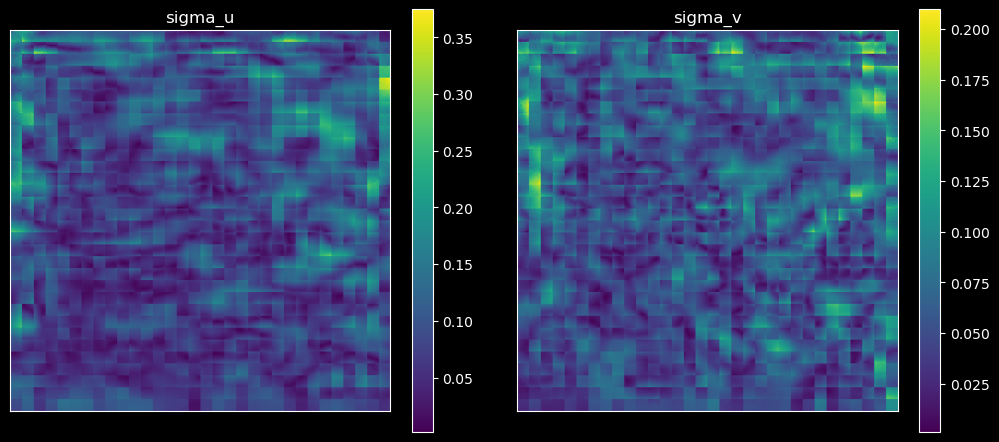

In [113]:
# data_path = '/home/panding/code/UR/piv-data/baseline-multimodel'
# datas = glob.glob(os.path.join(data_path, '*.npy'))
# randomidx = np.random.permutation(len(datas))
# datas = [datas[i] for i in randomidx]

baseline_1 = MultiMethod(datas_multimodel[0], 0)
print(datas_multimodel[0])
# baseline_1.show()
sigma_u, sigma_v = baseline_1.std(show=1)
# sigma_u_t, sigma_v_t = baseline_1.std_truth(show=1)
# uncertainty_u, uncertainty_v = baseline_1.uncertainty(show=1)

detransform has competed
/home/panding/code/UR/piv-data/baseline-multitransform/backstep_Re1500_00949.npy


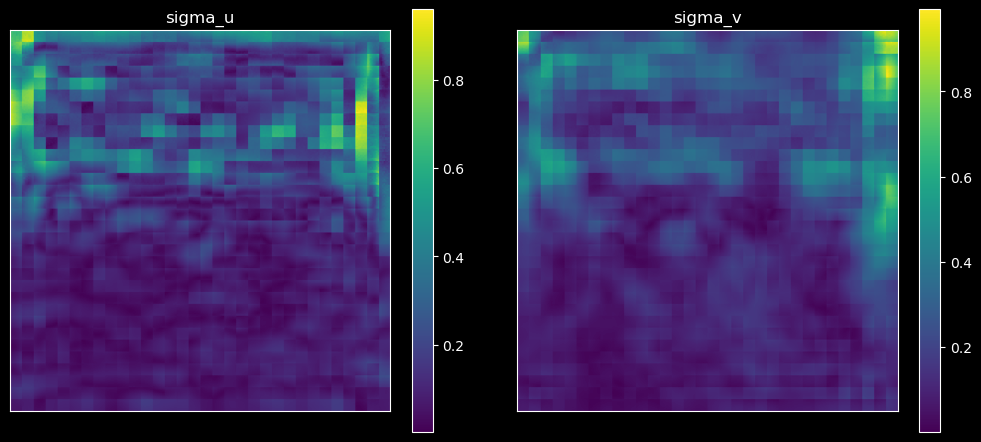

In [114]:
# data_path = '/home/panding/code/UR/piv-data/baseline-multitransform'
# datas = glob.glob(os.path.join(data_path, '*.npy'))
# randomidx = np.random.permutation(len(datas))
# datas = [datas[i] for i in randomidx]

baseline_2 = MultiMethod(datas_multitransform[0], 1)
print(datas_multitransform[0])
# baseline_2.show()
sigma_u, sigma_v = baseline_2.std(show=1)
# sigma_u_t, sigma_v_t = baseline_2.std_truth(show=1)
# uncertainty_u, uncertainty_v = baseline_2.uncertainty(show=1)

completed!


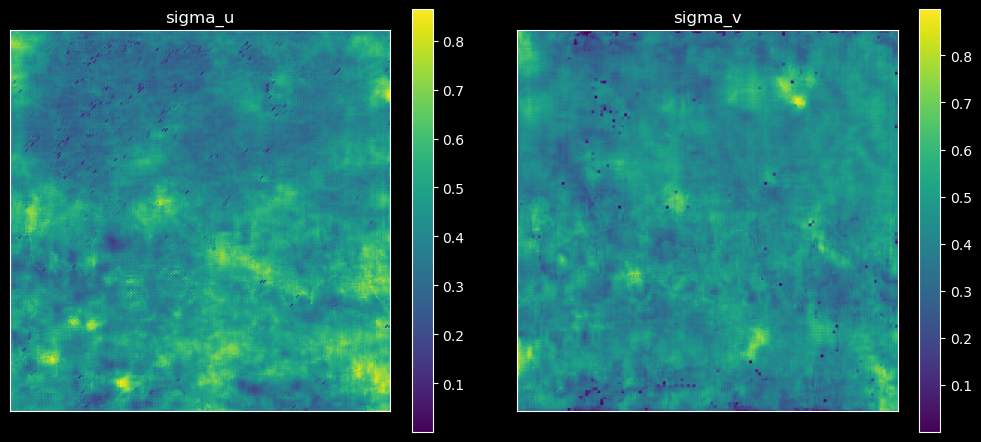

In [115]:
model_path = '/home/panding/code/UR/ur-model/validation-3.pt'
my_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = np.load(datas_ur[0])
data = data[:4]

uncertainty = Ur(data, path=model_path, device=my_device)
sigma_u_ur, sigma_v_ur = uncertainty.get_sigma()

plt.figure(figsize=(12,8))
        
plt.subplot(1, 2, 1)
plt.title('sigma_u')
plt.xticks([])
plt.yticks([])
plt.imshow(np.abs(sigma_u_ur.transpose(1, 2, 0)))
plt.colorbar(fraction=0.05)

plt.subplot(1, 2, 2)
plt.title('sigma_v')
plt.xticks([])
plt.yticks([])
plt.imshow(np.abs(sigma_v_ur.transpose(1, 2, 0)))
plt.colorbar(fraction=0.05)

plt.show()